In [1]:
library(ComplexHeatmap)
load("Fig4B.Rdata")

Loading required package: grid

ComplexHeatmap version 2.9.3
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




In [2]:
alter_fun = list(
    background = alter_graphic("rect", fill = "#CCCCCC"),   
    DEL = alter_graphic("rect", fill = col["DEL"]),
    AMP = alter_graphic("rect", fill = col["AMP"]),
    MUT = alter_graphic("rect", height = 0.33, fill = col["MUT"])
)
col = c("DEL" = "blue", "AMP" = "red", "MUT" = "#008000")

In [3]:
XCL1=c(rep("Low",11),rep("High",11))
names(XCL1)=sample_order
ht_opt("heatmap_row_names_gp" = gpar(fontsize = 15))
ht_opt("heatmap_column_names_gp" = gpar(fontsize = 25))
top = HeatmapAnnotation(foo = anno_block(gp = gpar(fill = "blue",col="blue"),
        labels = c("XCL1 Low"),                              
        labels_gp = gpar(col = "white", fontsize = 10)))
options(repr.plot.width=5,repr.plot.height=7)
h2=oncoPrint(mat[gene_order,sample_order[1:11]],show_column_names = TRUE,show_pct = TRUE,#row_split= factor(c(rep("A",13),rep("B",11))),
             show_row_names = FALSE,show_heatmap_legend=FALSE,row_order=gene_order,
              row_split = split,row_title = NULL,row_gap = unit(5, "mm"),
    alter_fun = alter_fun, col = col, column_order = sample_order[1:11],
     remove_empty_rows = FALSE,
         top_annotation =top,
         right_annotation=NULL)

All mutation types: MUT, DEL, AMP.

`alter_fun` is assumed vectorizable. If it does not generate correct
plot, please set `alter_fun_is_vectorized = FALSE` in `oncoPrint()`.



In [4]:
heatmap_legend_param = list(title = "Alternations", at = c("DEL", "AMP", "MUT"), 
        labels = c("Deletion", "Amplification", "Mutation"))

top=columnAnnotation( High=rep("High",11),
                     col=list(High=c("Low"="blue","High"="red"))
    )

top = HeatmapAnnotation(foo = anno_block(gp = gpar(fill = "red",col="red"),
        labels = c("XCL1 High"),                              
        labels_gp = gpar(col = "white", fontsize = 10)))

h1=oncoPrint(mat[gene_order,sample_order[12:22]],show_column_names = TRUE,pct_side = "right",row_names_side = "left", 
             row_split = split,row_gap = unit(5, "mm"),
             show_pct = TRUE,show_row_names = TRUE,row_order=gene_order,
    alter_fun = alter_fun, col = col, column_order = sample_order[12:22],heatmap_legend_param = heatmap_legend_param,
     remove_empty_rows = FALSE,
         top_annotation =top,
         right_annotation=NULL)

All mutation types: MUT, DEL, AMP.

`alter_fun` is assumed vectorizable. If it does not generate correct
plot, please set `alter_fun_is_vectorized = FALSE` in `oncoPrint()`.



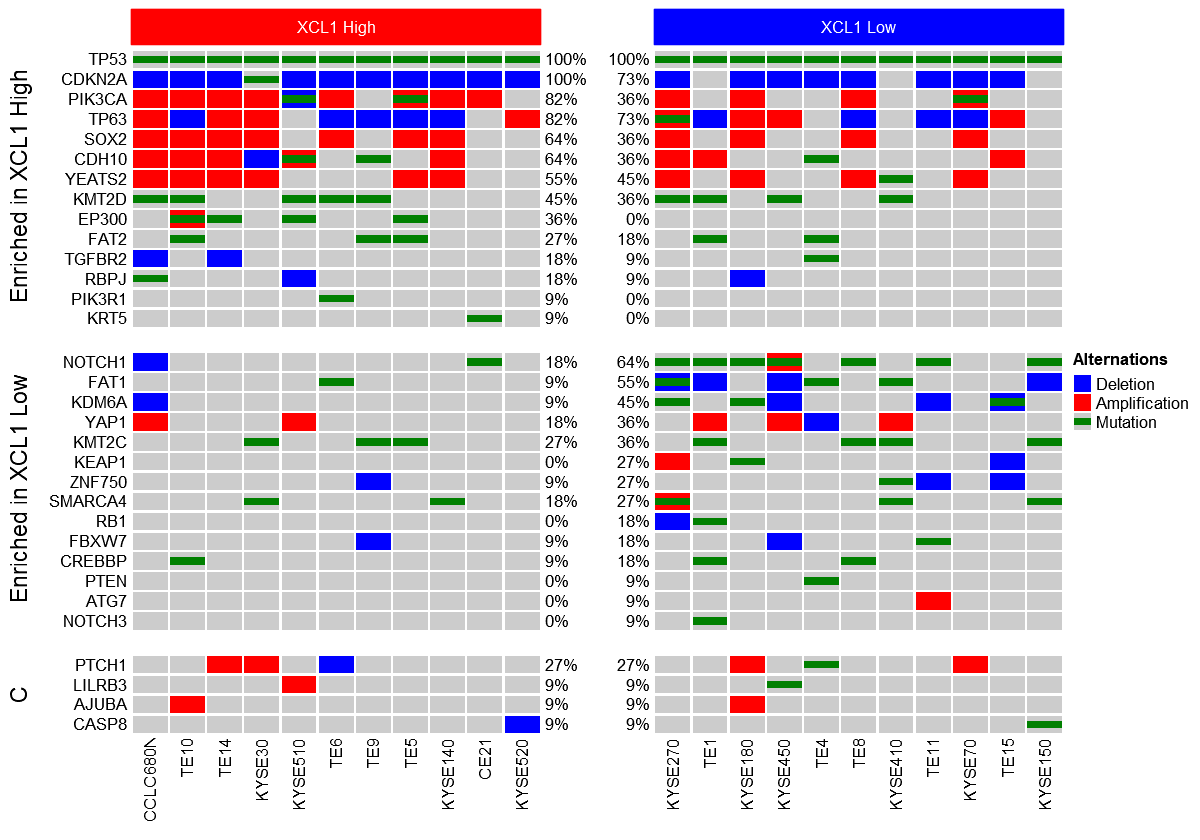

In [5]:
options(repr.plot.width=10,repr.plot.height=7)
h1+h2